<a href="https://colab.research.google.com/github/alexandr-khvatov/text_classification/blob/main/src/clear_and_lemmatize_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install wget --quiet
!pip install pymorphy2 --quiet

In [72]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pymorphy2
import matplotlib.pyplot as plt

In [73]:
import wget
import os

GET_FILE_NAME = 'data_original_RU_merge_2ch_and_ok.csv'
url = 'https://raw.githubusercontent.com/alexandr-khvatov/text_classification/main/data/'+GET_FILE_NAME

PATH_CLEANED_DATASET = GET_FILE_NAME
if not os.path.exists(PATH_CLEANED_DATASET):
    wget.download(url)

In [74]:
tqdm.pandas()

In [75]:
df = pd.read_csv(PATH_CLEANED_DATASET)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262702 entries, 0 to 262701
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  262702 non-null  object
 1   toxic    262702 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ MB


In [77]:
df.head(10)

,comment,toxic
0,скотина! что сказать,1
1,я сегодня проезжала по рабочей и между домами ...,0
2,очередной лохотрон. зачем придумывать очередно...,0
3,"ретро дежавю ... сложно понять чужое сердце , ...",0
4,а когда мы статус агрогородка получили?,0
5,2 августа поздно вечером нашли вот такую потер...,0
6,вчера надыбала новые стикеры #u2a94ec7fabs#,0
7,заколоть этого плешивого урода что бы крякнул ...,1
8,а еще на стоянке никто не проверяет безопаснос...,0
9,"красота..!! если есть, что показать??!! почему...",0


Axes(0.125,0.11;0.775x0.77)


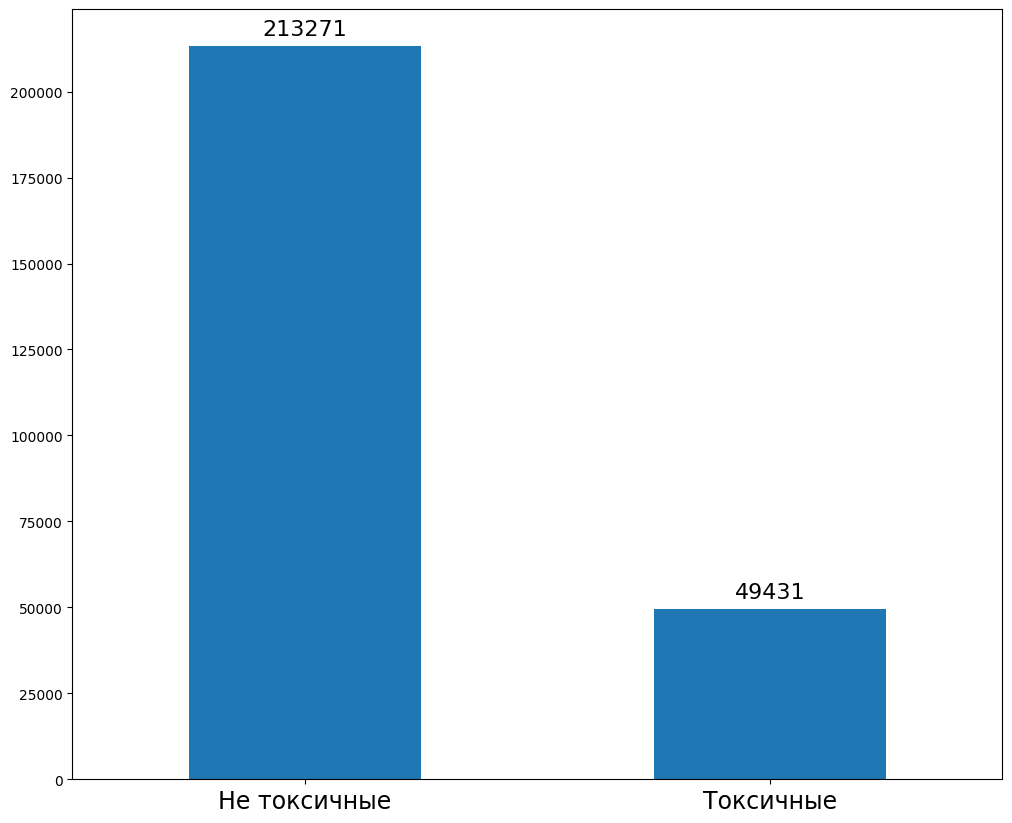

In [78]:
fig, ax = plt.subplots(figsize=(12, 10))
toxic = (df['toxic'].value_counts()).plot(kind='bar')
print(toxic)
ax.set_xticklabels(['Не токсичные', 'Токсичные'], rotation=0, fontsize=17)
# plt.grid(color='lightblue', linestyle=':')
# plt.text(0, 1, (df['toxic'].value_counts())[0], horizontalalignment='center', fontsize=21, color='yellow')
# plt.text(1, 1, (df['toxic'].value_counts())[1], horizontalalignment='center', fontsize=21, color='yellow')
# plt.show()

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:}".format(y_value)

        # Create annotation
        ax.annotate(
            
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=16,
            )                      # Vertically align label differently for
                                        # positive and negative values.
add_value_labels(ax)

In [79]:
morph = pymorphy2.MorphAnalyzer()
def lemmatize_word(word: str) -> str:
        p = morph.parse(word)[0]
        return p.normal_form 


In [80]:
w=lemmatize_word('перплексиями')
w

'перплексия'

In [81]:
import re
def clear_and_lemmatize_text(text):
    text= text.lower()
    clear = re.sub(r'[^а-яА-ЯёЁ]', ' ', text) # все кроме кириллических букв
    clear = re.sub(r"\s+[а-яА-ЯёЁ]\s+", ' ', clear) # одиночные буквы
    clear = re.sub(r'\s+', ' ', clear) # лишние пробелы
     
    return ' '.join([lemmatize_word(word) for word in clear.split(' ')])

In [85]:
r=clear_and_lemmatize_text("Новая ёлочка")
r

'новый ёлочка'

In [82]:
%%time
df['comment'] = df['comment'].progress_apply(clear_and_lemmatize_text)

100%|██████████| 262702/262702 [12:14<00:00, 357.88it/s]

CPU times: user 11min 45s, sys: 4.11 s, total: 11min 49s
Wall time: 12min 14s


In [86]:
df.head(10)

,comment,toxic
0,скотина что сказать,1
1,я сегодня проезжать по рабочий между дом сните...,0
2,очередной лохотрон зачем придумывать очередной...,0
3,ретро дежавю сложно понять чужое сердце лиш ощ...,0
4,а когда мы статус агрогородок получить,0
5,август поздно вечером наслать вот такой потер...,0
6,вчера надыбал новый стикер,0
7,заколоть это плешивый урод что бы крякнуть как...,1
8,а ещё на стоянка никто не проверять безопаснос...,0
9,красота если есть что показать почему нет,0


In [84]:
from google.colab import files
FILE_NAME_CLEAR_DATA='data_cleaned_RU_merge_2ch_and_ok.csv'
df.to_csv(FILE_NAME_CLEAR_DATA, encoding='utf-8', index=False)
files.download(FILE_NAME_CLEAR_DATA)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>